In [106]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
# import numpy as np
df = pd.read_csv("../Link-Feedback -august-dump (1).csv")
os = "iPhone"
version = "2.14.1"
df = df[df["Device OS"].str.contains(os)]
# df["Version Name"].value_counts()
# df.head(5)
# df["Operator"].value_counts()
df = df[df["Version Name"].str.contains(version)]
df["Version Name"].value_counts()
df.head(5)

,Feedback ID,Feedback Time,Event,Rating,Specifics,User Comment,Call Type,NV Device ID,Link Device ID,Device Make,...,Device OS,Latitude,Longitude,Operator,CGI,Cell ID,NV Module,Version Name,SDK Version,Unnamed: 20
2,56ef3d8b-636a-4e45-8681-8a778204fbd7,2023-08-30,Voice Call,1.0,"Unable to make a call,Call dropped,Poor audio,...",-,NoCall,DC000000033329341,urn:uuid:E87AFFB2-79EA-429C-84F0-1EA7CF8A6E1E,Apple,...,iPhone 16.6,1.5564,110.3623,NTT Docomo,-,-,Link,2.14.2,3.0.0,NaN
19,8915ef98-ad24-45e3-a95c-0d02d62f1a52,2023-08-30,others,0.0,-,Feedback sent from code.,NoCall,DC000000035065760,urn:uuid:C29EDE12-4286-4378-9D4B-876BBF08FB27,Apple,...,iPhone 15.5,-,-,Rakuten,-,-,Link,2.14.2,3.0.0,NaN
21,7cfa28e8-2cad-461e-9ad5-108c32c80e39,2023-08-30,others,0.0,-,Feedback sent from code.,NoCall,DC000000035065760,urn:uuid:C29EDE12-4286-4378-9D4B-876BBF08FB27,Apple,...,iPhone 15.5,-,-,Rakuten,-,-,Link,2.14.2,3.0.0,NaN
52,5c62b72d-49e9-4ad4-8a9c-50ac7c7967dc,2023-08-30,Voice Call,5.0,-,-,NoCall,DC000000007284930,urn:uuid:257F06FF-77EA-40A6-994B-41104FA87724,Apple,...,iPhone 16.6,33.5807,130.4187,Rakuten,-,-,Link,2.14.2,3.0.0,NaN
75,6224b8ff-4833-4614-a1eb-51bdce9ea662,2023-08-30,Voice Call,5.0,-,-,NoCall,DC000000011519538,urn:uuid:302FB131-1B10-4C2D-8471-B5D5208FA054,Apple,...,iPhone 16.6,38.2597,140.8768,Rakuten,-,-,Link,2.14.2,3.0.0,NaN


In [107]:
def autopct_format(values):
        def custom_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return custom_format
def pie_chart(column):
    s = df[column].value_counts().sort_index()
    if column == "Rating":
        c = ["red", "brown", "orange", "purple", "blue", "green"]
        e = (0, 0, 0, 0, 0, 0.1) 
        plt.pie(s, labels=s.index, autopct=autopct_format(s), colors=c, explode=e)
    else:
        plt.pie(s, labels=s.index, autopct=autopct_format(s))

    # plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va="center", rotation_mode="anchor", size=8)
    plt.title(column + " Percentage: " + (os + ": " + version))
    plt.show()


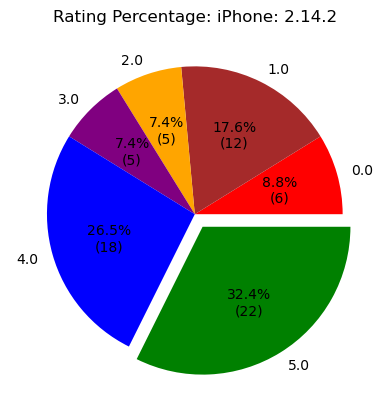

In [108]:
# Case 1: show percentage of rating for 
pie_chart("Rating")


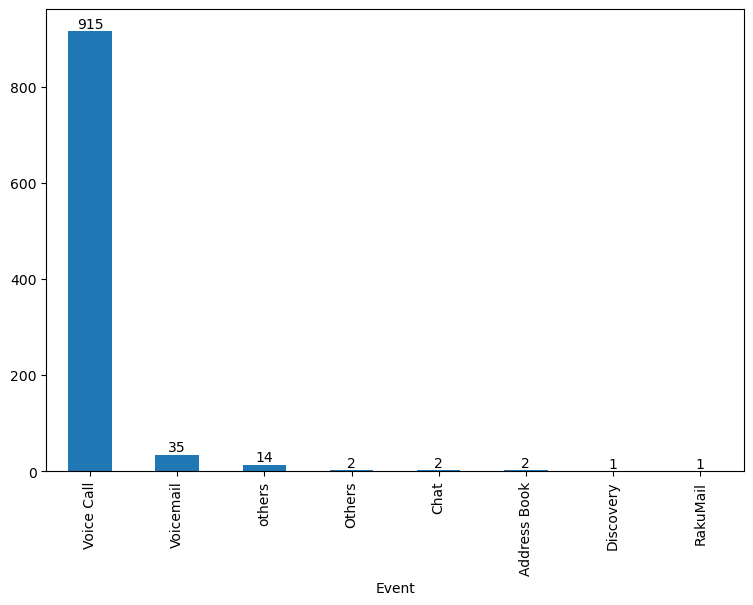

In [90]:
# Case 2: show percentage of event for 
# pie_chart("Event")


def bar_chart_with_value_label(type, x, y):
    series = df[type].value_counts()
    dict = series.to_dict()
# type(dict.keys())
    plt.figure(figsize=(x,y))
    fig = series.plot(kind='bar')
    fig.set_xticklabels(dict.keys())
    fig.bar_label(fig.containers[0], label_type="edge")

# def bar_chart_test(rating):
#     newDf = df[df["Rating"] <= rating]
#     dict = {}
#     for type in ["Call dropped", "Poor audio", "No audio", "Unable to make call"]:
#         s = newDf[newDf["Specifics"].str.contains(type)] 
#         dict[type] = len(s.index)
#         print("Addign value: " + str(type) + " : " + str(len(s.index)))
#     plt.suptitle("Reason comparision for rating less than " + str(rating))
#     plt.bar(dict.keys(), dict.values(), width=0.2)
#     plt.show()

bar_chart_with_value_label("Event", 9 , 6)


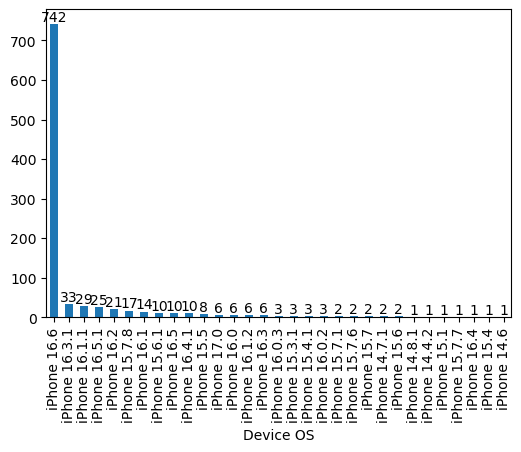

In [91]:
# Case 3: show percentage of android version for 
# pie_chart("Device OS")
# dict = df["Device OS"].value_counts().to_dict()
# plt.bar(dict.keys(), dict.values(), width=0.2)
# plt.show()
# dict
bar_chart_with_value_label("Device OS", 6 ,4)

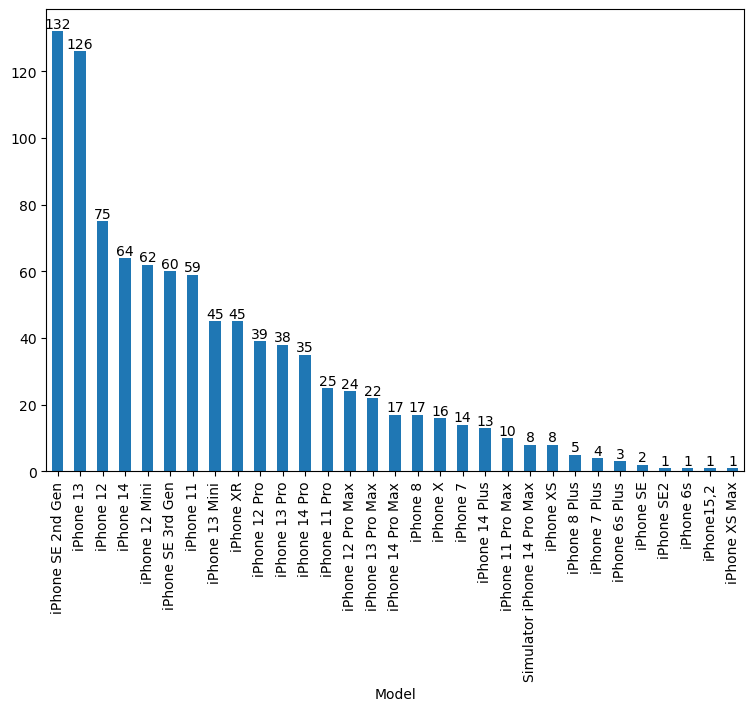

In [92]:
# Case 4: show percentage of device maker
# pie_chart("Device Make")
bar_chart_with_value_label("Model", 9 ,6)

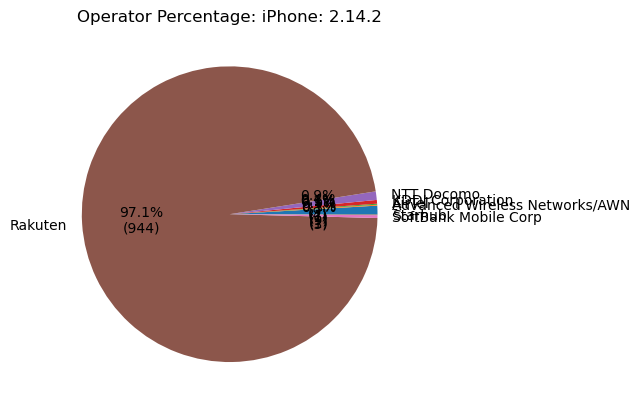

In [93]:

# Case 5: show percentage of operator
pie_chart("Operator")

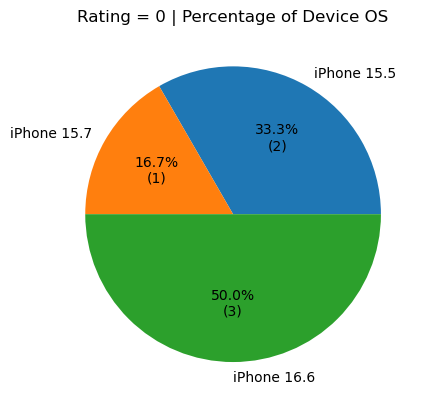

In [109]:
def pie_chart_rating_based(rating, column):
    newDf = df[df["Rating"] == rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating = " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based(0, "Device OS")

# df[df["Rating"] == 0].value_counts().sort_index()

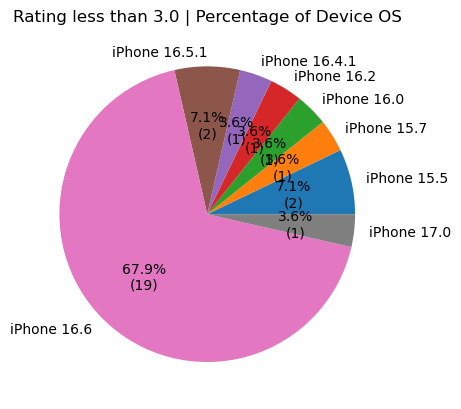

In [110]:
def pie_chart_rating_based_comparision(rating, column):
    newDf = df[df["Rating"] <= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating less than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based_comparision(3.0, "Device OS")

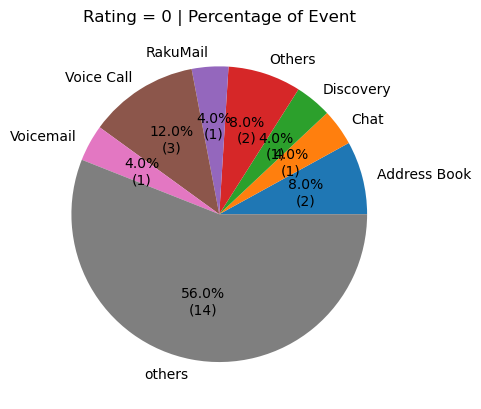

In [96]:
def pie_chart_issue_type_based_rating_equal(rating, column):
    newDf = df[df["Rating"] == rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating = " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating_equal(0, "Event")

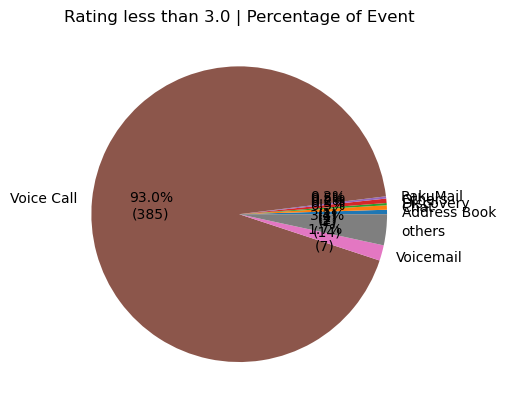

In [97]:
def pie_chart_issue_type_based_rating(rating, column):
    newDf = df[df["Rating"] <= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating less than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating(3.0, "Event")

# test = df[df["Rating"] >= 3.0]
# test.head(5)
# s = test["Event"].value_counts().sort_index()
# s

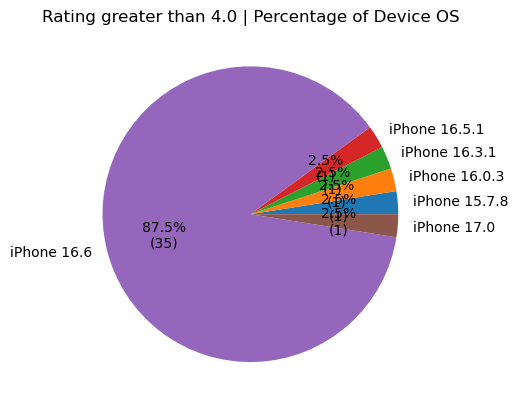

In [111]:
def pie_chart_rating_based_comparision_greater(rating, column):
    newDf = df[df["Rating"] >= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating greater than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_rating_based_comparision_greater(4.0, "Device OS")

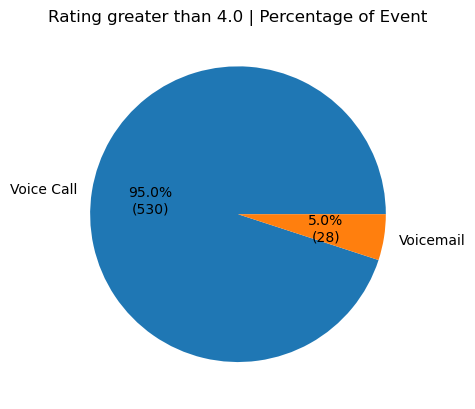

In [99]:
def pie_chart_issue_type_based_rating(rating, column):
    newDf = df[df["Rating"] >= rating]
    s = newDf[column].value_counts().sort_index()
    plt.pie(s, labels=s.index, autopct=autopct_format(s))
    plt.title("Rating greater than " + str(rating) + " | Percentage of " + column)
    plt.show()
    # s.head(3)

pie_chart_issue_type_based_rating(4.0, "Event")

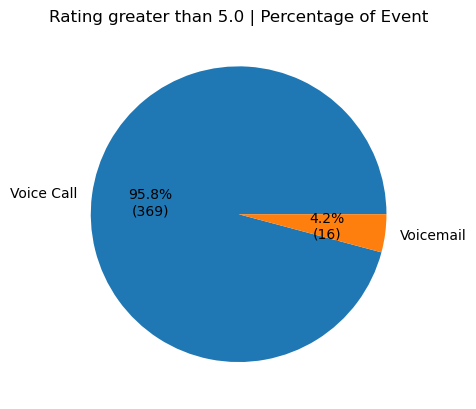

In [100]:
pie_chart_issue_type_based_rating(5.0, "Event")

Addign value: Call dropped : 210
Addign value: Poor audio : 234
Addign value: No audio : 89
Addign value: Unable to make call : 0


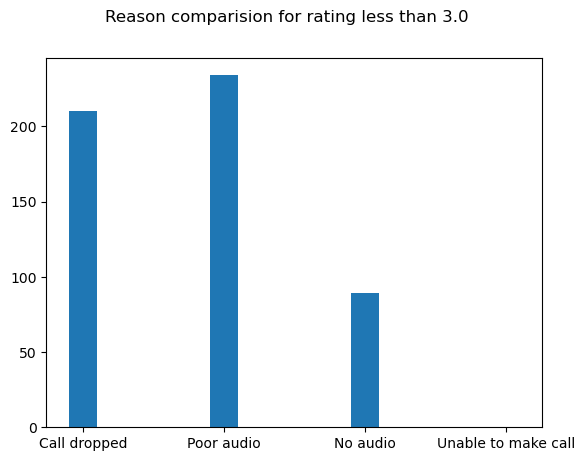

In [101]:
def bar_chart_reason_type_based_rating(rating):
    newDf = df[df["Rating"] <= rating]
    dict = {}
    for type in ["Call dropped", "Poor audio", "No audio", "Unable to make call"]:
        s = newDf[newDf["Specifics"].str.contains(type)] 
        dict[type] = len(s.index)
        print("Addign value: " + str(type) + " : " + str(len(s.index)))
    plt.suptitle("Reason comparision for rating less than " + str(rating))
    plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()

bar_chart_reason_type_based_rating(3.0)

